In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [2]:
# importing the zipfile module 
from zipfile import ZipFile 
  
# loading the temp.zip and creating a zip object 
with ZipFile("archive (2).zip", 'r') as zObject: 
  
    # Extracting all the members of the zip  
    # into a specific location. 
    zObject.extractall() 

In [3]:
df=pd.read_csv('Titanic-Dataset.csv')

In [4]:
df.shape

(891, 12)

In [5]:
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df=df.drop(columns=['Name','PassengerId','Ticket'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
df = pd.get_dummies(df, columns = ['Sex'])


In [8]:
value_count_embarked=dict(df['Embarked'].value_counts())
print(value_count_embarked)

{'S': 644, 'C': 168, 'Q': 77}


In [11]:
impute_most_frequent=SimpleImputer(strategy='most_frequent')
df['Embarked']=impute_most_frequent.fit_transform(df[['Embarked']])

In [12]:
df['Embarked'] = df['Embarked'].apply(lambda x: value_count_embarked[x])


In [13]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,NaN,644,0,1
1,1,1,38.0,1,0,71.2833,C85,168,1,0
2,1,3,26.0,0,0,7.9250,NaN,644,1,0
3,1,1,35.0,1,0,53.1000,C123,644,1,0
4,0,3,35.0,0,0,8.0500,NaN,644,0,1


In [14]:
df.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Cabin         687
Embarked        0
Sex_female      0
Sex_male        0
dtype: int64

In [15]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,505.249158,0.352413,0.647587
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,226.517531,0.477990,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,77.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,168.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,644.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,644.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,644.000000,1.000000,1.000000


In [90]:
# target.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [17]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [18]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [19]:
df['family']=df['SibSp']+df['Parch']
df.drop(columns=['SibSp','Parch','Cabin'],inplace=True)
df

,Survived,Pclass,Age,Fare,Embarked,Sex_female,Sex_male,family
0,0,3,22.0,7.2500,644,0,1,1
1,1,1,38.0,71.2833,168,1,0,1
2,1,3,26.0,7.9250,644,1,0,0
3,1,1,35.0,53.1000,644,1,0,1
4,0,3,35.0,8.0500,644,0,1,0
...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,644,0,1,0
887,1,1,19.0,30.0000,644,1,0,0
888,0,3,NaN,23.4500,644,1,0,3
889,1,1,26.0,30.0000,168,0,1,0


In [20]:
df['family'].isnull().sum()

0

In [95]:
# import seaborn as sns  

# sns.scatterplot(x='Fare', y='Survived', data=df)  
# plt.xlabel('Fare')  
# plt.ylabel('Survived (0 = No, 1 = Yes)')  
# plt.title('Survival vs Fare')  
# plt.show()

In [22]:
impute = SimpleImputer(  
    add_indicator=False,  
    copy=True,  
    fill_value=None,  
    missing_values=np.nan,  
    strategy='mean',  
    verbose=0  
)  
df['Age']=impute.fit_transform(df[['Age']])
df.head()

,Survived,Pclass,Age,Fare,Embarked,Sex_female,Sex_male,family
0,0,3,22.0,7.2500,644,0,1,1
1,1,1,38.0,71.2833,168,1,0,1
2,1,3,26.0,7.9250,644,1,0,0
3,1,1,35.0,53.1000,644,1,0,1
4,0,3,35.0,8.0500,644,0,1,0


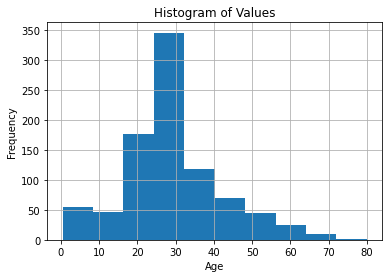

In [23]:
# Plot histogram  
df['Age'].hist(bins=10)  
plt.xlabel('Age')  
plt.ylabel('Frequency')  
plt.title('Histogram of Values')  
plt.show()

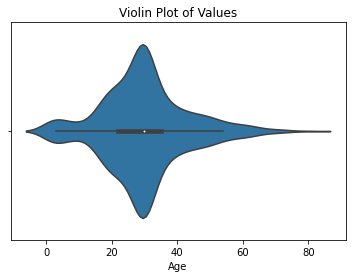

In [24]:
import seaborn as sns  
sns.violinplot(x=df['Age'])  
plt.xlabel('Age')  
plt.title('Violin Plot of Values')  
plt.show()

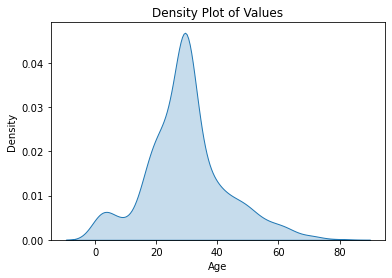

In [25]:


# Plot density plot  
sns.kdeplot(df['Age'], fill=True)  
plt.xlabel('Age')  
plt.title('Density Plot of Values')  
plt.show()

In [26]:
df['Fare']=impute.fit_transform(df[['Fare']])


In [27]:
df.head()

,Survived,Pclass,Age,Fare,Embarked,Sex_female,Sex_male,family
0,0,3,22.0,7.2500,644,0,1,1
1,1,1,38.0,71.2833,168,1,0,1
2,1,3,26.0,7.9250,644,1,0,0
3,1,1,35.0,53.1000,644,1,0,1
4,0,3,35.0,8.0500,644,0,1,0


In [28]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [29]:
X.head()

,Pclass,Age,Fare,Embarked,Sex_female,Sex_male,family
0,3,22.0,7.2500,644,0,1,1
1,1,38.0,71.2833,168,1,0,1
2,3,26.0,7.9250,644,1,0,0
3,1,35.0,53.1000,644,1,0,1
4,3,35.0,8.0500,644,0,1,0


In [30]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [32]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [33]:
X_train.shape,X_test.shape

((712, 7), (179, 7))

In [34]:
y_train.shape,y_test.shape

((712,), (179,))

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
params={'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [37]:
paramss={'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 3,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [38]:
clf=RandomForestClassifier(**params)

In [39]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=1)

In [40]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1], dtype=int64)

In [41]:
np.array(y_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8156424581005587